In [4]:
import os,shutil
original_dataset_dir = 'E:/Study/study/python/NLP/deeplearning_record/Downloads/kaggle'
base_dir = 'E:/Study/study/python/NLP/deeplearning_record/Downloads/cats_and_dogs_small'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# os.mkdir(base_dir)
#加载数据集，base_dir保存小数据集的目录

In [5]:
train_dir = os.path.join(base_dir,'train')
# # # os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
# # os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
# os.mkdir(test_dir)
#分别对应划分后的训练、验证和测试的目录

In [6]:
train_cats_dir = os.path.join(train_dir,'cats')
# # # os.mkdir(train_cats_dir)
# 猫训练的图像目录
train_dogs_dir = os.path.join(train_dir,'dogs')
# # os.mkdir(train_dogs_dir)
#狗训练的图像目录
validation_cats_dir = os.path.join(validation_dir,'cats')
# os.mkdir(validation_cats_dir)
#猫验证的图像目录
validation_dogs_dir = os.path.join(validation_dir,'dogs')
# os.mkdir(validation_dogs_dir)
# 狗验证的图像目录

test_cats_dir = os.path.join(test_dir,'cats')
# # os.mkdir(test_cats_dir)
#猫测试的图像目录
test_dogs_dir = os.path.join(test_dir,'dogs')
# os.mkdir(test_dogs_dir)
#狗测试的图像目录

In [7]:
# #将前1000张猫的图像复制到test_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir,fname)
#     dst = os.path.join(test_cats_dir,fname)
#     shutil.copyfile(src,dst)



#     # 将前1000张狗的图像复制到train_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# # 将前500张狗的图像复制到validation_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# # 将前1000张狗的图像复制到test_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [16]:
from keras import layers,models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

from keras import optimizers

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-10),
    metrics=['acc']
)


In [17]:
#数据处理
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_genertor = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size=20,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size= (150,150),
    batch_size=20,
    class_mode='binary'
)
#利用批量模型生成器拟合模型
history = model.fit_generator(
    train_genertor,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50)
#储存模型
model.save('cats_and_dogs_small_1.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 15s 149ms/step - loss: 0.6927 - acc: 0.5010 - val_loss: 0.6926 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6927 - acc: 0.5010 - val_loss: 0.6926 - val_acc: 0.5010
Epoch 3/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6927 - acc: 0.5010 - val_loss: 0.6926 - val_acc: 0.5010
Epoch 4/30
100/100 [==============================] - 13s 133ms/step - loss: 0.6927 - acc: 0.5010 - val_loss: 0.6926 - val_acc: 0.5010
Epoch 5/30
100/100 [==============================] - 13s 133ms/step - loss: 0.6927 - acc: 0.5010 - val_loss: 0.6926 - val_acc: 0.5010
Epoch 6/30
100/100 [==============================] - 14s 138ms/step - loss: 0.6927 - acc: 0.5010 - val_loss: 0.6926 - val_acc: 0.5010
Epoch 7/30
100/100 [==============================] - 14s 141ms/step - loss: 0.6927 - acc: 0.5010 - val_lo

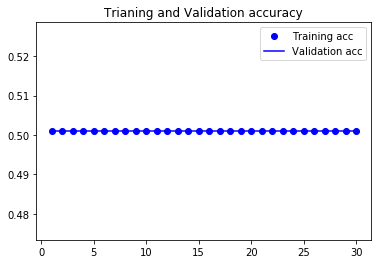

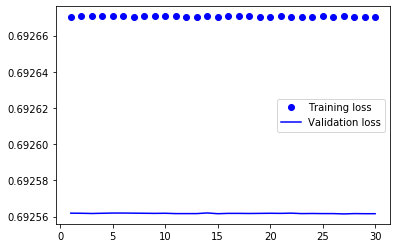

In [18]:
#绘制训练过程中的损失函数曲线和精度曲线
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Trianing and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

plt.show()


In [19]:
#利用ImageDataGenerator数据加强
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range =40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

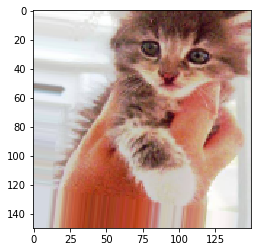

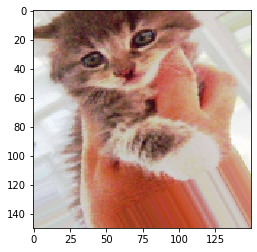

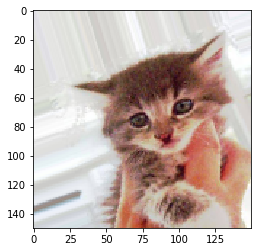

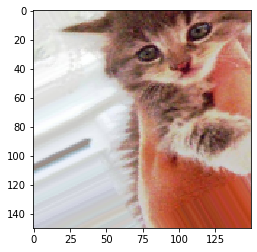

In [22]:
from keras.preprocessing import image
fname = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fname[3]
img = image.load_img(img_path,target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,)+x.shape)

i=0

for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

rain_genertor = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size=32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size= (150,150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_genertor,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 12s 125ms/step - loss: 0.6931 - acc: 0.5185 - val_loss: 0.6841 - val_acc: 0.5350
Epoch 2/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6797 - acc: 0.5790 - val_loss: 0.6649 - val_acc: 0.5870
Epoch 3/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6625 - acc: 0.5975 - val_loss: 0.6531 - val_acc: 0.5990
Epoch 4/30
100/100 [==============================] - 14s 137ms/step - loss: 0.6478 - acc: 0.6090 - val_loss: 0.6482 - val_acc: 0.6130
Epoch 5/30
100/100 [==============================] - 13s 135ms/step - loss: 0.6226 - acc: 0.6645 - val_loss: 0.6229 - val_acc: 0.6380
Epoch 6/30
100/100 [==============================] - 15s 148ms/step - loss: 0.5904 - acc: 0.6840 - val_loss: 0.6047 - val_acc: 0.6730
Epoch 7/30
100/100 [==============================] - 16s 158ms/step - loss: 0.5685 - acc: 0.6970 - val_lo

Epoch 18/30
100/100 [==============================] - 16s 160ms/step - loss: 0.4052 - acc: 0.8145 - val_loss: 0.5301 - val_acc: 0.7350
Epoch 19/30
100/100 [==============================] - 16s 159ms/step - loss: 0.3919 - acc: 0.8215 - val_loss: 0.5343 - val_acc: 0.7410
Epoch 20/30
100/100 [==============================] - 16s 163ms/step - loss: 0.3725 - acc: 0.8365 - val_loss: 0.5391 - val_acc: 0.7410
Epoch 21/30
100/100 [==============================] - 19s 195ms/step - loss: 0.3767 - acc: 0.8270 - val_loss: 0.5164 - val_acc: 0.7470
Epoch 22/30
100/100 [==============================] - 20s 204ms/step - loss: 0.3585 - acc: 0.8390 - val_loss: 0.5305 - val_acc: 0.7460
Epoch 23/30
100/100 [==============================] - 17s 171ms/step - loss: 0.3491 - acc: 0.8475 - val_loss: 0.5257 - val_acc: 0.7410
Epoch 24/30
100/100 [==============================] - 16s 163ms/step - loss: 0.3316 - acc: 0.8560 - val_loss: 0.5613 - val_acc: 0.7480
Epoch 25/30
100/100 [===========================